
# Project: Investigation of FBI Gun Data as compared with US Census Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
    <li><a href="#question1">Research Question1</a></li>
    <li><a href="#question2">Research Question2</a></li>
    <li><a href="#question3">Research Question3</a></li>
    </ul>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



>Today, the topic of gun ownership is considered a controversial and wide-ranging topic in the United States.  Many are calling for gun registration laws to be tighter while others say there is no issue to be had, it is merely a part of our culture.  Regardless of your personal opinion on the matter, one this is for certain.  We have to learn more about this topic to be able to have informed discussions about this with eachother.  That is why I chose this dataset to examine, to try and gather some perspective on gun ownership as it pertains to our population metrics.

>I aim to use this information to open conversations about this topic and scientifically understand a part of this issue using data-driven conclusions.

>The data is provided in two files.  The first is an excel file from the FBI's National Instant Criminal Background Check System, or NICS.  The NICS is used to determine whether a prospective buyer is eligible to purchase firearms or explosives.  Gun shops will use this system to ensure that the buyer does not have a criminal record or is otherwise ineligible to purchase the items.  The second is a CSV file that contains state level data provided by U.S. Census Bureau (census.gov).

### The questions I will be answering today are:<br/>
<ol>
    <li><b> Does having a college degree correlate with gun ownership? </b><br/></li>
    <li><b> Is there an association between a state's foreign born population percentage and high gun registrations?</b><br/></li>
    <li><b> What was the state with the highest amount of gun ownership per capita in 2016?  </b><br/></li>
</ol>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
# Data Wrangling
<br/> First will be to load in the data from the Excel and CSV formats into Pandas Dataframes

In [2]:
# Loading in Census data - CSV Format

census_df = pd.read_csv('U.S. Census Data.csv') 

census_df

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
5,"Persons under 5 years, percent, April 1, 2010",NaN,6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
6,"Persons under 18 years, percent, July 1, 2016,...",NaN,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,"Persons under 18 years, percent, April 1, 2010",NaN,23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
8,"Persons 65 years and over, percent, July 1, 2...",NaN,16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
9,"Persons 65 years and over, percent, April 1, 2010",NaN,13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,...,0.143,0.134,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%


In [3]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

In [4]:
census_df.describe()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,"Living in same house 1 year ago, percent of pe...",(c),"322,025",7.30%,50.30%,50.90%,50.30%,3.30%,5.70%,51.60%,...,20411059,0.048,50.40%,2.50%,"625,741","$245,000",6.90%,1.50%,63.50%,7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


In [5]:
# Loading in FBI Gun data - Excel Format

gundata_df = pd.read_excel('gun_data.xlsx')

gundata_df

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
5,2017-09,Colorado,4356.0,0.0,15751.0,13448.0,1007.0,1062,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35873
6,2017-09,Connecticut,4343.0,673.0,4834.0,1993.0,274.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12117
7,2017-09,Delaware,275.0,0.0,1414.0,1538.0,66.0,68,0.0,0.0,...,0.0,0.0,0.0,55.0,34.0,3.0,1.0,2.0,0.0,3502
8,2017-09,District of Columbia,1.0,0.0,56.0,4.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61
9,2017-09,Florida,10784.0,0.0,39199.0,17949.0,2319.0,1721,1.0,18.0,...,0.0,0.0,0.0,11.0,9.0,0.0,0.0,1.0,0.0,77390


In [6]:
gundata_df.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


# Data Cleaning

Census_df gave 52 columns of information.  Considering that two of them were for 'Fact' and 'Fact Note', there were 50 states remaining.  This is what we were expecting.  However, Gundata_df had 55 "states".  This looks to include the five U.S. Colonies: District of Columbia, Virgin Islands, Guam, Puerto Rico and Mariana Islands.  These will need to be removed as they are not included with the Census info and will skew our findings.

In [7]:
# Remove name of the colonies : District of Columbia, Virgin Islands, Guam, Puerto Rico and Mariana Islands 

gundata_df = gundata_df[gundata_df.state != 'District of Columbia']
gundata_df = gundata_df[gundata_df.state != 'Virgin Islands']
gundata_df = gundata_df[gundata_df.state != 'Guam']
gundata_df = gundata_df[gundata_df.state != 'Puerto Rico']
gundata_df = gundata_df[gundata_df.state != 'Mariana Islands']

In [8]:
# Removing variables that are unnecessary to my calculations

gundata_df = gundata_df.drop([ 'permit', 'permit_recheck', 'handgun','long_gun', 'other', 'multiple', 'admin',
        'prepawn_handgun', 'prepawn_long_gun', 'prepawn_other', 'redemption_handgun', 'redemption_long_gun', 'redemption_other', 
        'returned_handgun', 'returned_long_gun', 'returned_other', 'rentals_handgun', 'rentals_long_gun', 'private_sale_handgun',
       'private_sale_long_gun', 'private_sale_other', 'return_to_seller_handgun', 'return_to_seller_long_gun','return_to_seller_other'], 
        axis = 1)

In [9]:
# Will need to convert the 'month' column into DateTime

gundata_df['month'] = pd.to_datetime(gundata_df['month'])

In [10]:
# Dropped column 'Fact Note' as not needed and assigned to new DataFrame

degree_df = census_df.drop(columns=['Fact Note'])


# Dropped bottom 21 rows as they were non-numerical data

degree_df = degree_df.drop(degree_df.tail(21).index)

degree_df.tail()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
59,"Nonminority-owned firms, 2012","272,651","51,147","344,981","189,029","1,819,107","442,365","259,614","54,782","1,121,749",...,74228,434025,"1,224,845","218,826","70,491","450,109","426,697","104,785","379,934","55,397"
60,"Veteran-owned firms, 2012","41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206","185,756",...,8604,59379,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
61,"Nonveteran-owned firms, 2012","316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318","1,846,686",...,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
62,"Population per square mile, 2010",94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,350.6,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,"Land area in square miles, 2010","50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54","53,624.76",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"


<a id='eda'></a>
# Exploratory Data Analysis

<a id='question1'></a>
### <u>Question One</u>: Does having a college degree correlate with gun ownership?

In [11]:
# Creating dataframe to use for this question
gundata_totals_df = gundata_df.groupby(['state']).sum()

gundata_totals_df.head()

,totals
state,
Alabama,6706079
Alaska,1137643
Arizona,4425714
Arkansas,3752633
California,19014063


In [12]:
# Taking last column of gundata_df, adding data to new row of degree_df

move_df = gundata_totals_df['totals']

degree_df = degree_df.append(move_df)

degree_df.tail()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
60,"Veteran-owned firms, 2012","41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206","185,756",...,8604,59379,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
61,"Nonveteran-owned firms, 2012","316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318","1,846,686",...,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
62,"Population per square mile, 2010",94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,350.6,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,"Land area in square miles, 2010","50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54","53,624.76",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"
totals,NaN,6.70608e+06,1.13764e+06,4.42571e+06,3.75263e+06,1.90141e+07,6.05848e+06,3.16813e+06,491369,1.16958e+07,...,1.21571e+06,7.31129e+06,1.94352e+07,4.33827e+06,484447,5.87868e+06,6.38452e+06,3.20889e+06,5.13172e+06,894306


In [13]:
# Fill in missing row label and reset indexes

degree_df.iloc[64, 0] = 'Totals'

degree_df.reset_index()

degree_df.tail()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
60,"Veteran-owned firms, 2012","41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206","185,756",...,8604,59379,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
61,"Nonveteran-owned firms, 2012","316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318","1,846,686",...,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
62,"Population per square mile, 2010",94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,350.6,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,"Land area in square miles, 2010","50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54","53,624.76",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"
totals,Totals,6.70608e+06,1.13764e+06,4.42571e+06,3.75263e+06,1.90141e+07,6.05848e+06,3.16813e+06,491369,1.16958e+07,...,1.21571e+06,7.31129e+06,1.94352e+07,4.33827e+06,484447,5.87868e+06,6.38452e+06,3.20889e+06,5.13172e+06,894306


In [14]:
# Transposing degree_df so that columns and rows are switched
# This is to make correlation easier to perform

degree_df = degree_df.transpose()

degree_df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,totals
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",Totals
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33",6.70608e+06
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95",1.13764e+06
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08",4.42571e+06
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48",3.75263e+06


In [15]:
# Converting totals & degree columns into float for calculations

degree_df['totals'] = pd.to_numeric(degree_df['totals'], errors='coerce')
degree_df[35] = pd.to_numeric(degree_df[35], errors='coerce')

degree_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Fact to Wyoming
Data columns (total 65 columns):
0         51 non-null object
1         51 non-null object
2         51 non-null object
3         51 non-null object
4         51 non-null object
5         51 non-null object
6         51 non-null object
7         51 non-null object
8         51 non-null object
9         51 non-null object
10        51 non-null object
11        51 non-null object
12        51 non-null object
13        51 non-null object
14        51 non-null object
15        51 non-null object
16        51 non-null object
17        51 non-null object
18        51 non-null object
19        51 non-null object
20        51 non-null object
21        51 non-null object
22        51 non-null object
23        51 non-null object
24        51 non-null object
25        51 non-null object
26        51 non-null object
27        51 non-null object
28        51 non-null object
29        51 non-null object
30        51 non-null ob

In [16]:
# Calculates the correlation between columns for % of state that has a Bachelor's degree or higher
# and the column with the total number of gun registrations

degree_df[35].corr(degree_df['totals'])

-0.1458269346205181

   >This correlation coefficient (-.15) shows a weak negative correlation between the variables.  There appears to be no relationship between a state's number of gun registrations and the number of residents that have a Bachelor's degree or higher.

<a id='question2'></a>
## Question 2

### Is there an association between a state's foreign born population percentage and high gun registrations?

In [17]:
degree_df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,totals
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",NaN
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33",6706079.0
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95",1137643.0
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08",4425714.0
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48",3752633.0
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22",19014063.0
Colorado,"5,540,545","5,029,324",10.20%,"5,029,196",6.10%,6.80%,22.80%,24.40%,13.40%,10.90%,...,"547,352","284,554","194,508","85,849","442,365","51,722","469,524",48.5,"103,641.89",6058482.0
Connecticut,"3,576,452","3,574,114",0.10%,"3,574,097",5.20%,5.70%,21.10%,22.90%,16.10%,14.20%,...,"326,693","187,845","106,678","56,113","259,614","31,056","281,182",738.1,"4,842.36",3168126.0
Delaware,"952,065","897,936",6.00%,"897,934",5.80%,6.20%,21.50%,22.90%,17.50%,14.40%,...,"73,418","38,328","23,964","14,440","54,782","7,206","60,318",460.8,"1,948.54",491369.0
Florida,"20,612,439","18,804,592",9.60%,"18,801,310",5.50%,5.70%,20.10%,21.30%,19.90%,17.30%,...,"2,100,187","1,084,885","807,817","926,112","1,121,749","185,756","1,846,686",350.6,"53,624.76",11695777.0


In [18]:
# Dropping columns that are not necessary to calculations

degree_df = degree_df.drop(columns=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 20, 21, 22, 23, 
                                    24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 
                                    38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 
                                    52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

In [19]:
# Deleting Fact row as I will place that info in the column headers

degree_df = degree_df.drop(['Fact'], axis=0)


In [20]:
# Rename columns for easier reading

degree_df.columns = ['Population Estimates', 'White Alone', 'African American', 'Indian/Alaksan', 'Asian', 
                     'Pacific Islander', 'Two or More Races', 'Hispanic', 'White Alone/Not Hispanic', 'Totals']

In [21]:
degree_df

,Population Estimates,White Alone,African American,Indian/Alaksan,Asian,Pacific Islander,Two or More Races,Hispanic,White Alone/Not Hispanic,Totals
Alabama,"4,863,300",69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,6706079.0
Alaska,"741,894",66.10%,3.80%,15.20%,6.30%,1.30%,7.30%,7.00%,61.20%,1137643.0
Arizona,"6,931,071",83.30%,4.90%,5.40%,3.40%,0.30%,2.80%,30.90%,55.50%,4425714.0
Arkansas,"2,988,248",79.40%,15.70%,1.00%,1.60%,0.30%,2.00%,7.30%,72.90%,3752633.0
California,"39,250,017",72.70%,6.50%,1.70%,14.80%,0.50%,3.80%,38.90%,37.70%,19014063.0
Colorado,"5,540,545",87.50%,4.50%,1.60%,3.30%,0.20%,3.00%,21.30%,68.60%,6058482.0
Connecticut,"3,576,452",80.60%,11.80%,0.50%,4.70%,0.10%,2.30%,15.70%,67.70%,3168126.0
Delaware,"952,065",70.10%,22.60%,0.60%,4.00%,0.10%,2.60%,9.20%,62.90%,491369.0
Florida,"20,612,439",77.60%,16.80%,0.50%,2.90%,0.10%,2.10%,24.90%,54.90%,11695777.0
Georgia,"10,310,371",61.20%,32.00%,0.50%,4.10%,0.10%,2.10%,9.40%,53.40%,7209942.0



<b>**** At this point, I noticed that columns containing the Ethnicity (foreign born population) data were in different formats.  Some states were in the percentage format of a string (i.e. 39.6%) while others were in a decimal format of a string (i.e. .39).  Ranked alphabetically, the differing states are New Mexico through Tennessee.  But they are already in a format I can use.  I will have to clean the remaining states' data up in order to perform calculations on these columns.<br/></b>
><b>In order to do this I will  have to parse out the '%', convert the string into a numeric format and then divide by 100 to make the percentages their corresponding decimals.</b>



In [22]:
# Need to remove all commas to convert to float

degree_df['Population Estimates'] = degree_df['Population Estimates'].str.replace(',', '')

# Need to remove all % signs and convert to decimal

degree_df['White Alone'] = degree_df['White Alone'].str.replace('%', '')
degree_df['African American'] = degree_df['African American'].str.replace('%', '')
degree_df['Indian/Alaksan'] = degree_df['Indian/Alaksan'].str.replace('%', '')
degree_df['Asian'] = degree_df['Asian'].str.replace('%', '')
degree_df['Pacific Islander'] = degree_df['Pacific Islander'].str.replace('%', '')
degree_df['Two or More Races'] = degree_df['Two or More Races'].str.replace('%', '')
degree_df['Hispanic'] = degree_df['Hispanic'].str.replace('%', '')
degree_df['White Alone/Not Hispanic'] = degree_df['White Alone/Not Hispanic'].str.replace('%', '')   

In [23]:
# Converting columns 1 through 8 into float for calculations

degree_df['White Alone'] = pd.to_numeric(degree_df['White Alone'], errors='coerce')
degree_df['African American'] = pd.to_numeric(degree_df['African American'], errors='coerce')
degree_df['Indian/Alaksan'] = pd.to_numeric(degree_df['Indian/Alaksan'], errors='coerce')
degree_df['Asian'] = pd.to_numeric(degree_df['Asian'], errors='coerce')
degree_df['Pacific Islander'] = pd.to_numeric(degree_df['Pacific Islander'], errors='coerce')
degree_df['Two or More Races'] = pd.to_numeric(degree_df['Two or More Races'], errors='coerce')
degree_df['Hispanic'] = pd.to_numeric(degree_df['Hispanic'], errors='coerce')
degree_df['White Alone/Not Hispanic'] = pd.to_numeric(degree_df['White Alone/Not Hispanic'], errors='coerce')

In [24]:
degree_df

,Population Estimates,White Alone,African American,Indian/Alaksan,Asian,Pacific Islander,Two or More Races,Hispanic,White Alone/Not Hispanic,Totals
Alabama,4863300,69.300,26.800,0.700,1.400,0.100,1.600,4.200,65.800,6706079.0
Alaska,741894,66.100,3.800,15.200,6.300,1.300,7.300,7.000,61.200,1137643.0
Arizona,6931071,83.300,4.900,5.400,3.400,0.300,2.800,30.900,55.500,4425714.0
Arkansas,2988248,79.400,15.700,1.000,1.600,0.300,2.000,7.300,72.900,3752633.0
California,39250017,72.700,6.500,1.700,14.800,0.500,3.800,38.900,37.700,19014063.0
Colorado,5540545,87.500,4.500,1.600,3.300,0.200,3.000,21.300,68.600,6058482.0
Connecticut,3576452,80.600,11.800,0.500,4.700,0.100,2.300,15.700,67.700,3168126.0
Delaware,952065,70.100,22.600,0.600,4.000,0.100,2.600,9.200,62.900,491369.0
Florida,20612439,77.600,16.800,0.500,2.900,0.100,2.100,24.900,54.900,11695777.0
Georgia,10310371,61.200,32.000,0.500,4.100,0.100,2.100,9.400,53.400,7209942.0


In [25]:
# Converting sliced numbers into decimal to make columns uniform

degree_df.iloc[:31, 1:9] /= 100
degree_df.iloc[43:, 1:9] /= 100

In [26]:
degree_df.iloc[43:]

,Population Estimates,White Alone,African American,Indian/Alaksan,Asian,Pacific Islander,Two or More Races,Hispanic,White Alone/Not Hispanic,Totals
Utah,3051217,0.911,0.014,0.016,0.025,0.010,0.025,0.138,0.788,4338273.0
Vermont,624594,0.946,0.013,0.004,0.018,NaN,0.019,0.019,0.931,484447.0
Virginia,8411808,0.700,0.198,0.005,0.066,0.001,0.029,0.091,0.624,5878675.0
Washington,7288000,0.800,0.041,0.019,0.086,0.008,0.046,0.124,0.695,6384517.0
West Virginia,1831102,0.936,0.036,0.002,0.008,NaN,0.017,0.015,0.923,3208889.0
Wisconsin,5778708,0.875,0.066,0.011,0.028,0.001,0.019,0.067,0.817,5131725.0
Wyoming,585501,0.928,0.013,0.027,0.010,0.001,0.021,0.100,0.841,894306.0


In [27]:
# Calculate correlation between the different demographics and total gun ownership

# "White alone" demographic
caucasian = degree_df['White Alone'].corr(degree_df['Totals'])
print(caucasian , "Caucasian")

# "Black or African American" demographic
black_or_african_america = degree_df['African American'].corr(degree_df['Totals'])
print(black_or_african_america , "Black or African American")

# "American Indian and Alaska Native alone" demographic
american_indian_and_alaska_native = degree_df['Indian/Alaksan'].corr(degree_df['Totals'])
print(american_indian_and_alaska_native , "American Indian and Alaska Native")

# "Asian alone" demographic
asian = degree_df['Asian'].corr(degree_df['Totals'])
print(asian , "Asian")

# "Native Hawaiian and Other Pacific Islander" demographic
pacific_islander = degree_df['Pacific Islander'].corr(degree_df['Totals'])
print(pacific_islander , "Native Hawaiian and Other Pacific Islander")

# "Two or More Races" demographic
two_or_more = degree_df['Two or More Races'].corr(degree_df['Totals'])
print(two_or_more , "Two or More Races")

# "Hispanic or Latino" demographic
hispanic_or_latino = degree_df['Hispanic'].corr(degree_df['Totals'])
print(hispanic_or_latino , "Hispanic or Latino")

# "White alone, not Hispanic or Latino" demographic
white_alone = degree_df['White Alone/Not Hispanic'].corr(degree_df['Totals'])
print(white_alone , "White alone, not Hispanic or Latino")

0.359249191635234 Caucasian
0.3653745661328345 Black or African American
0.3135475805393711 American Indian and Alaska Native
0.3552190682865831 Asian
0.14446399714441338 Native Hawaiian and Other Pacific Islander
0.3395844850304311 Two or More Races
0.3609438567312971 Hispanic or Latino
0.3573536491109735 White alone, not Hispanic or Latino


In [28]:
degree_df.head()

,Population Estimates,White Alone,African American,Indian/Alaksan,Asian,Pacific Islander,Two or More Races,Hispanic,White Alone/Not Hispanic,Totals
Alabama,4863300,0.693,0.268,0.007,0.014,0.001,0.016,0.042,0.658,6706079.0
Alaska,741894,0.661,0.038,0.152,0.063,0.013,0.073,0.070,0.612,1137643.0
Arizona,6931071,0.833,0.049,0.054,0.034,0.003,0.028,0.309,0.555,4425714.0
Arkansas,2988248,0.794,0.157,0.010,0.016,0.003,0.020,0.073,0.729,3752633.0
California,39250017,0.727,0.065,0.017,0.148,0.005,0.038,0.389,0.377,19014063.0



>With almost all of the correlation coefficients ranging from .31-.36, the results show no significant correlation between gun ownership totals and ancestry percentage as a whole.

<a id='question3'></a>
## Question 3

### Which states had the highest total gun restistration per capita as of July 2016?

In [29]:
# Creating new dataframe containing only necessary data

capita_df = degree_df[['Population Estimates', 'Totals']].copy()


In [30]:
# Converting population column to float for calculations

capita_df['Population Estimates'] = pd.to_numeric(capita_df['Population Estimates'])

In [31]:
capita_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 2 columns):
Population Estimates    50 non-null int64
Totals                  50 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1.2+ KB


In [32]:
capita_df['State'] = capita_df.index

In [33]:
capita_df.head()

,Population Estimates,Totals,State
Alabama,4863300,6706079.0,Alabama
Alaska,741894,1137643.0,Alaska
Arizona,6931071,4425714.0,Arizona
Arkansas,2988248,3752633.0,Arkansas
California,39250017,19014063.0,California


In [34]:
# Calculating the per capita gun totals for each state

capita_df['gun reg per capita'] = capita_df['Totals']/capita_df['Population Estimates']

In [35]:
# Sorting in descending order by wanted metric

capita_df = capita_df.sort_values(['gun reg per capita'], ascending=False)

In [36]:
# Retreiving top 10 states ranked by gun reg per capita

capita_df.head(10)

,Population Estimates,Totals,State,gun reg per capita
Kentucky,4436974,29762434.0,Kentucky,6.707822
Montana,1042520,1884124.0,Montana,1.807279
West Virginia,1831102,3208889.0,West Virginia,1.752436
Alaska,741894,1137643.0,Alaska,1.533431
Wyoming,585501,894306.0,Wyoming,1.527420
Utah,3051217,4338273.0,Utah,1.421817
South Dakota,865454,1215712.0,South Dakota,1.404710
Alabama,4863300,6706079.0,Alabama,1.378915
Arkansas,2988248,3752633.0,Arkansas,1.255797
North Dakota,757952,947440.0,North Dakota,1.250000


Text(0.5, 1.0, 'State Gun Registrations Per Capita')

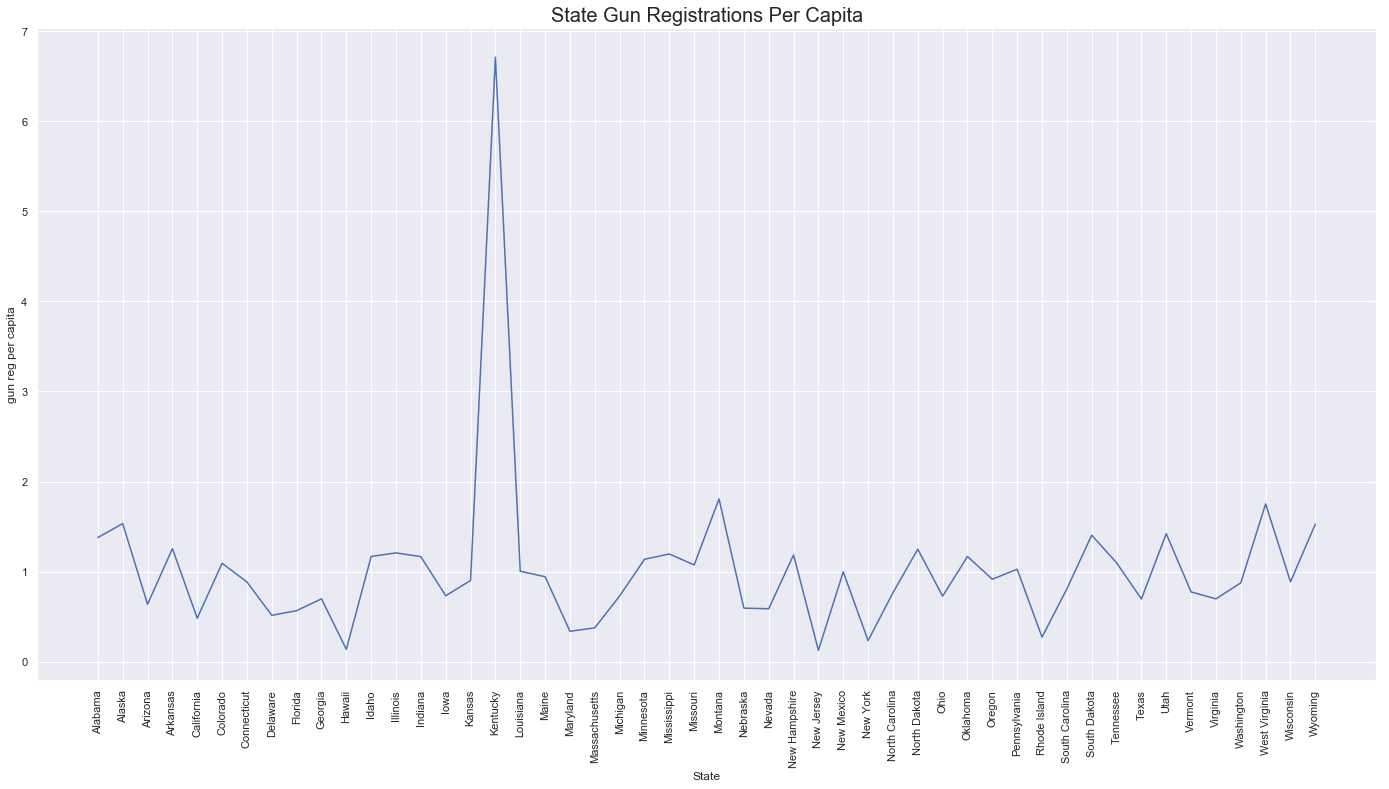

In [38]:
# Creating Seaborn line plot to visualize data
sns.set(rc={'figure.figsize':(24, 12)})

sns.lineplot(x="State", y="gun reg per capita", data=capita_df)
plt.xticks(rotation=90)
plt.rcParams["xtick.labelsize"] = 17
plt.title('State Gun Registrations Per Capita', fontsize=20)

>Analysis of this data shows that the state of Kentucky clearly has, by a very wide margin, the most gun registrations per capita of any state in the United States.  Since Kentucky has more than three and a half times more gun registrations per capita than its next-in-line, I would say that further analysis could be done on why that is so different compared to the rest of the US.  Analysis could be done on the state-level gun laws to determine a factor.  Some things to consider/investigate would be the number of gun shows within state lines, gun regulations regarding selling/trading of firearms and length of waiting period for background checks.

<a id='conclusions'></a>
# Conclusions

><ol><b>
    <li>Question One: There does not appear to be any correlation between a state's number of gun registrations and the number of residents that have a Bachelor's degree or higher.</li>
  <li>Question Two: With the exception of the Native Hawaiian/Pacific Islander group, almost all of the correlation coefficients ranged from .31-.36. This could indicate that there is no significant correlation between gun ownership totals and ancestry percentage as a whole. </li>
  <li>Question Three: The State of Kentucky has the highest Gun Registrations per Capita of any state in the U.S.  This is by a wide margin, as well.  I would recommend further research into such a distinctive outlier.  More lenient laws regarding firearms/explosives in Kentucky could be an easy cause for such a vast difference with the other states.</li>
    </b></ol>